In [169]:
import csv
import random
def insort(array,comparisons=0):
    sort=[array[0]]
    for i in range(1,len(array)):
        for z in range(0,len(sort)):
            if array[i]>sort[z]:
                comparisons+=1
                if z==len(sort)-1:
                    sort.append(array[i])
                continue
            if array[i]<=sort[z]:
                comparisons+=1
                sort.insert(z,array[i])
                break
    return comparisons
#####################################
def quick(array,left=0,right=-1,comparisons=0):
    if right<0:
        right=len(array)-1
    L,R=left,right
    P=L#random.randint(L,R)
    pivot=array[P]
    #left loop
    while(left<right):
        for left in range(left,R+1):
            if array[left]>pivot:
                break
            else:
                comparisons+=1
        for right in range(right,L-1,-1):
            if array[right]<pivot:
                break
            else:
                comparisons+=1
        if left<right:
            array[left],array[right]=array[right],array[left]
    if P<=right:
        array[right],array[P]=pivot,array[right]
        P=right
    else:
        array[left],array[P]=pivot,array[left]
        P=left
    c1,c2=0,0
    if P-L>=2:
        c1=quick(array,L,P-1)
    if R-P>=2:
        c2=quick(array,P+1,R)
    return c1+c2+comparisons

   
#####################################################
def merge(a1,a2,j=0,k=0,comparisons=0):
    a3=[]
    for i in range(0,len(a1)+len(a2)):
        if j<len(a1) and (k>=len(a2) or a1[j]<=a2[k]) :
            a3.append(a1[j])
            j+=1
        else:
            a3.append(a2[k])
            k+=1
        comparisons+=1
    return a3,comparisons
def msort(ar,comparisons=0):
    if len(ar)==2:
        if ar[0]>ar[1]:
            ar[0],ar[1]=ar[1],ar[0]
        return ar,1
    if len(ar)==1:
        return ar,0
    else:
        half=int(len(ar)/2)
        x=msort(ar[:half])
        y=msort(ar[half:])
        return merge(x[0],y[0],0,0,x[1]+y[1])
########################################
   
            

In [202]:
samples=1
sum1=0
sum2=0
sum3=0
NSize=[]
insertion_sort=[]
quick_sort=[]
merge_sort=[]

for a in range(1,21):
    NSize.append(a*10)
    for b in range(0,samples):
        inputlist=[]
        for c in range(0,10*a):
                inputlist.append(random.randint(1,1000))
        sum1+=msort(inputlist)[1]
        sum3+=insort(inputlist)
        sum2+=quick(inputlist)
    quick_sort.append(int(sum2/samples))
    merge_sort.append(int(sum1/samples))
    insertion_sort.append(int(sum3/samples))
print('Quick',quick_sort)
print('Merge',merge_sort)
print('Insertion',insertion_sort)



Quick [33, 129, 277, 515, 772, 1095, 1555, 2124, 2762, 3450, 4310, 5195, 6112, 7204, 8383, 9627, 10996, 12480, 14111, 15881]
Merge [30, 110, 244, 444, 712, 1040, 1440, 1920, 2480, 3116, 3822, 4598, 5448, 6388, 7418, 8538, 9748, 11048, 12438, 13910]
Insertion [27, 124, 350, 706, 1361, 2266, 3549, 5038, 7237, 9844, 13163, 16968, 20840, 26123, 32180, 38480, 45232, 52998, 62710, 72548]


[ 2.75063910e+00 -2.19927895e+02  4.20795789e+03] [  0.45340567 -13.35481545 246.43421053] [  0.39074732  -9.94174983 181.25964912]


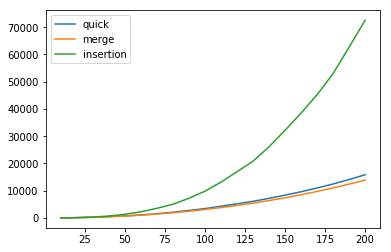

In [240]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(NSize,quick_sort)
plt.plot(NSize,merge_sort)
plt.plot(NSize,insertion_sort)
plt.legend(['quick','merge','insertion'])
fin=np.polyfit(NSize,insertion_sort,2)
fq=np.polyfit(NSize,quick_sort,2)
fm=np.polyfit(NSize,merge_sort,2)
print(fin,fq,fm)